# Atividade semanal - Analisando os dados da Olist

Utilizar a base de dados disponibilizada pela Olist, uma empresa de e-commerce. Essa base de dados
é composta por 9 tabelas, conforme o seguinte esquema:

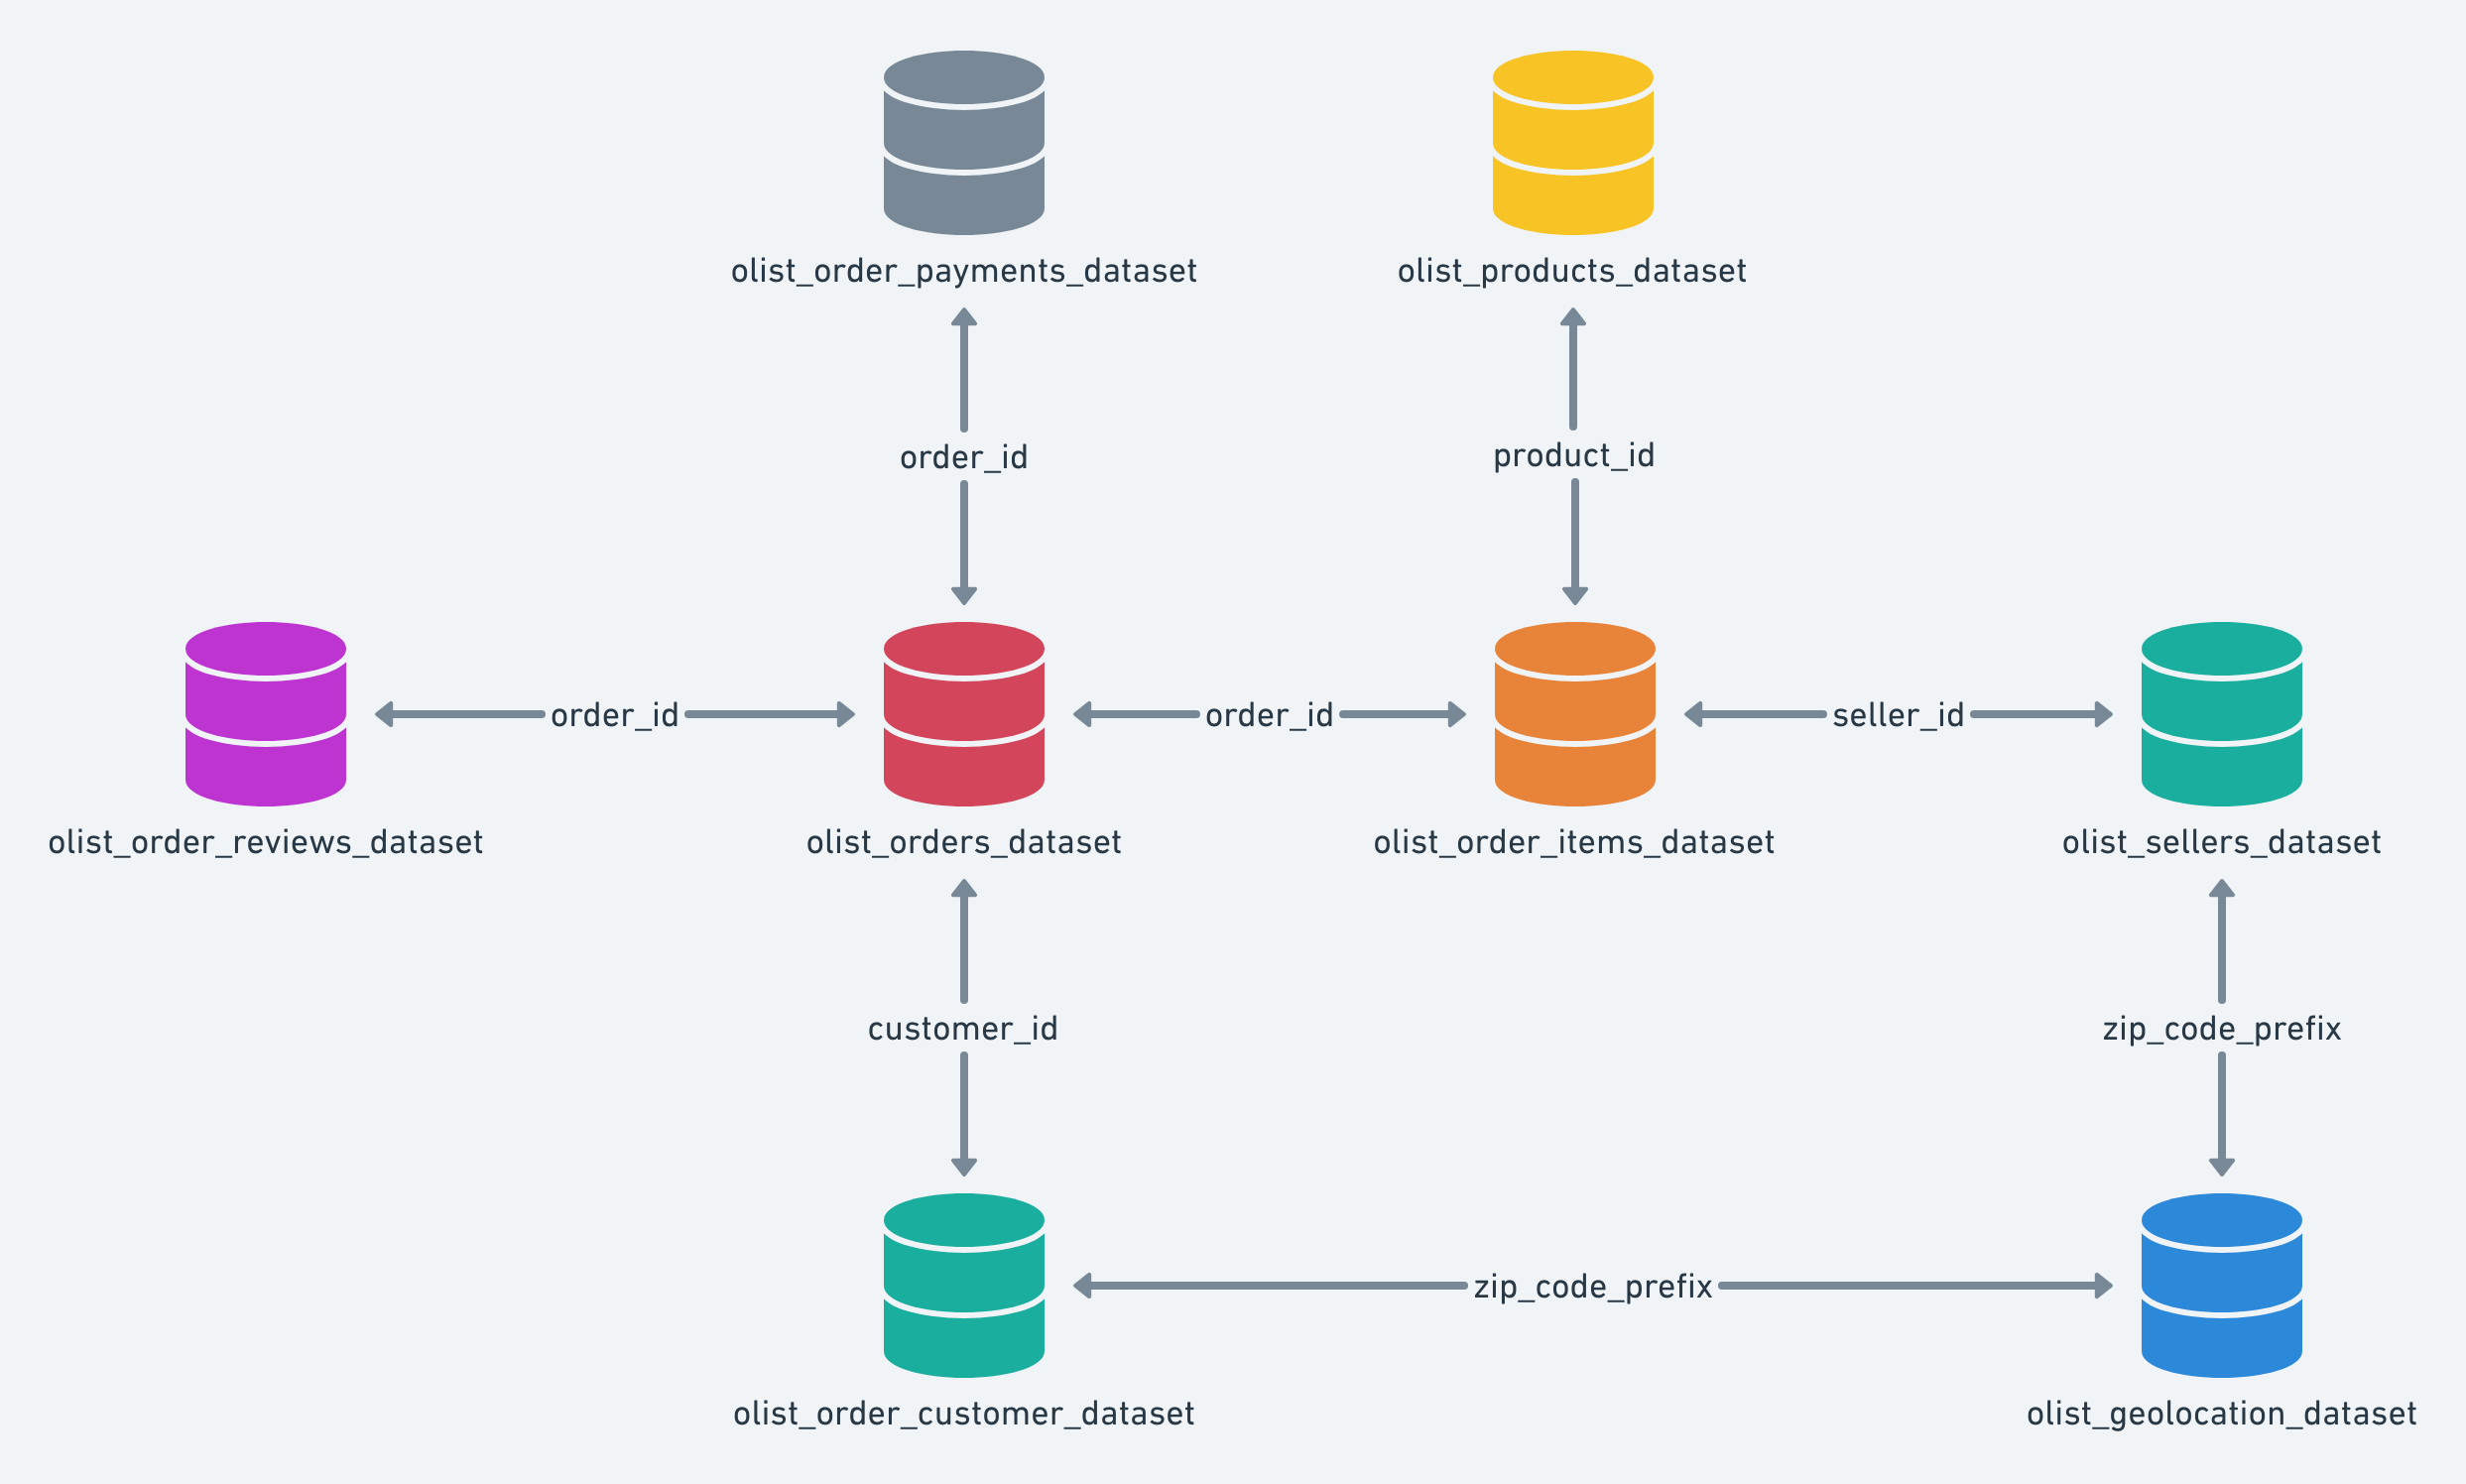

De acordo com a professora, essa base de dados é uma base menos "limpa" e é o que mais se aproxima da análise de dados do dia-a-dia de uma pessoa que trabalha com dados no mundo corporativo.

Para ter acesso à base de dados, acesse: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


## **Objetivo da atividade:**
Sedimentar os conhecimentos de Análise de Dados que aprendemos nessa aula.

##**Desafio:**
Criar um notebook de análise exploratória (como fizemos na nossa aula de hoje) com todas as etapas de coleta, limpeza, análise e visualização com base de dados da Olist.

##**Requisitos:**

- Formular o mínimo de 4 perguntas para responder com suas análises;
- Utilizar pelo menos 3 bases de dados da Olist.
- Criar pelo menos 3 gráficos.
- Exporte sua base final.


# Coleta dos Dados

Nossa base de dados da Olist é composta por 9 tabelas diferentes, nelas temos informações de:
- pedidos (olist_orders_dataset);
- itens dos pedidos (olist_order_items_dataset);
- review dos usuários sobre os pedidos (olist_order_reviews_dataset);
- detalhes de pagamento dos pedidos (olist_order_payments_dataset);
- detalhes do consumidor que fez os pedidos (olist_customers_dataset);
- detalhes de geolocalização do consumidor (olist_geolocation_dataset);
- detalhes dos produtos (olist_products_dataset);
- detalhes dos vendedores (olist_sellers_dataset).

Na minha análise, irei focar em três datasets, o de consumidor **(olist_customers_dataset)**, o de pagamento dos pedidos **(olist_order_payments_dataset)** e o de pedidos **(olist_orders_dataset)**.

Observação: Eu iria usar o de geolocalização do consumidor (olist_geolocation_dataset), contudo, as colunas que me ajudariam a responder as perguntas da minha análise também estavam contidas no dataset das informações dos consumidores.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_consumidor = pd.read_csv('olist_customers_dataset.csv')
df_consumidor

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
df_pedidos = pd.read_csv('olist_orders_dataset.csv')
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
df_pagamento = pd.read_csv('olist_order_payments_dataset.csv')
df_pagamento

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


# Objetivo da minha análise exploratória:

Responder as seguintes perguntas:

- Qual o estado onde há mais consumidores que já compraram na Olist?
- Qual forma de pagamento mais usada pelos consumidores?
- Cidade onde há mais consumidores com preferência da forma de pagamento ser cartão.
- Qual a probabilidade do pedido ser entregue dado o consumidor clicou em finalizar o pedido?
- O número médio de parcelas para pagar um pedido.

# Limpando os dados da Olist

## Pedidos

In [ ]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
df_pedidos.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
remover_colunas = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
df_pedidos = df_pedidos.drop(remover_colunas, axis=1)
df_pedidos

,order_id,customer_id,order_status,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54


In [ ]:
#filtrar pedidos finalizados
df_pedidos['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
#escolher pedidos que foram aprovados
df_pedidos_aprovados = df_pedidos.loc[df_pedidos['order_status'] == 'shipped']
df_pedidos_aprovados

,order_id,customer_id,order_status,order_delivered_customer_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,NaN
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,NaN
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,NaN
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,NaN
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,NaN
...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,NaN
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,NaN
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,NaN
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,NaN


In [ ]:
#escolher pedidos que foram entregues
df_pedidos_entregues = df_pedidos.loc[df_pedidos['order_status'] == 'delivered']
df_pedidos_entregues

,order_id,customer_id,order_status,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54


## Formas de pagamento

In [ ]:
df_pagamento

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
df_pagamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df_pagamento.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


## Consumidor

In [ ]:
df_consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
remover = ['customer_unique_id', 'customer_zip_code_prefix']
df_consumidor = df_consumidor.drop(remover, axis=1)
df_consumidor

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,canoas,RS


In [ ]:
df_consumidor.isnull().sum()

,0
customer_id,0
customer_city,0
customer_state,0


## Juntando os três datasets

Para unir os 3 datasets usaremos a função merge(), precisamos entender qual é a coluna em comum entre os 3: no nosso caso, serão as colunas customer_id e order_id.



In [ ]:
#escolher pedidos que foram entregues
df_pedidos = df_pedidos.loc[df_pedidos['order_status'] == 'delivered']
df_pedidos

,order_id,customer_id,order_status,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54


In [ ]:
df_olist = pd.merge(df_pedidos, df_pagamento, on='order_id').merge(df_consumidor, on='customer_id')
df_olist

,order_id,customer_id,order_status,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,1,credit_card,1,18.12,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,3,voucher,1,2.00,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2,voucher,1,18.59,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,1,boleto,1,141.46,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,1,credit_card,3,179.12,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...
100751,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-17 15:08:01,1,credit_card,3,85.08,sao jose dos campos,SP
100752,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-28 17:37:56,1,credit_card,3,195.00,praia grande,SP
100753,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-09-21 11:24:17,1,credit_card,5,271.01,nova vicosa,BA
100754,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54,1,credit_card,4,441.16,japuiba,RJ


In [ ]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100756 entries, 0 to 100755
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100756 non-null  object 
 1   customer_id                    100756 non-null  object 
 2   order_status                   100756 non-null  object 
 3   order_delivered_customer_date  100748 non-null  object 
 4   payment_sequential             100756 non-null  int64  
 5   payment_type                   100756 non-null  object 
 6   payment_installments           100756 non-null  int64  
 7   payment_value                  100756 non-null  float64
 8   customer_city                  100756 non-null  object 
 9   customer_state                 100756 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.7+ MB


In [ ]:
# Exportando a base final
df_olist.to_csv('base_final_s14_parte2.csv', index=False)

# **Analisando os dados**

Agora chegou a hora de respondermos as perguntas que estipulamos no começo dessa análise:
- Qual a probabilidade do pedido ser entregue dado o consumidor clicou em finalizar o pedido?
- O número médio de parcelas para pagar um pedido.
- Qual forma de pagamento mais usada pelos consumidores?
- Cidade onde há mais consumidores com preferência da forma de pagamento ser cartão.
- Qual o estado onde há mais consumidores que já compraram na Olist?

## **Qual a probabilidade do pedido ser entregue dado que o consumidor clicou em finalizar o pedido?**

In [ ]:
numero_pedidos_totais = len(df_pagamento)
numero_pedidos_entregues = len(df_pedidos_entregues)
probabilidade_entregas = (numero_pedidos_entregues / numero_pedidos_totais)*100
print(f'A probabilidade de um pedido ser entregue dado que o consumidor tentou e/ou conseguiu finalizar o pagamento é de {probabilidade_entregas:.2f}%.')

A probabilidade de um pedido ser entregue dado que o consumidor tentou e/ou conseguiu finalizar o pagamento é de 92.87%.


##**Número médio de parcelas para pagar um pedido.**



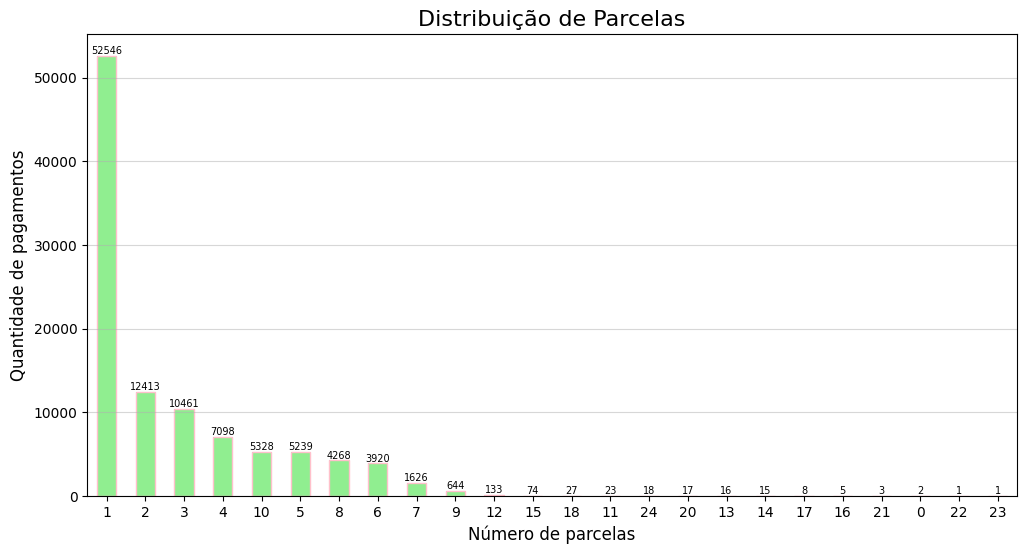

In [ ]:
import seaborn as sns

contagem_parcelas = df_pagamento['payment_installments'].value_counts()

plt.figure(figsize=(12, 6))
contagem_parcelas.plot(kind= 'bar') #gráfico de barras

ax = contagem_parcelas.plot(kind='bar', color='lightgreen', edgecolor='pink')
plt.title('Distribuição de Parcelas', fontsize=16)
plt.xlabel('Número de parcelas', fontsize=12)
plt.ylabel('Quantidade de pagamentos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)

ax.bar_label(ax.containers[0], fontsize=7, color='black')

plt.show()

In [ ]:
numero_medio_parcelas = df_pagamento['payment_installments'].mean()
print(f'O número médio de parcelas para pagar um pedido é de {numero_medio_parcelas:.2f}, arredondando isto é de {numero_medio_parcelas:.0f} parcelas.')

O número médio de parcelas para pagar um pedido é de 2.85, arredondando isto é de 3 parcelas.


##**Qual forma de pagamento mais usada pelos consumidores?**

In [ ]:
forma_pagamento_mais_usada = df_olist['payment_type'].mode()[0]

print(f'A forma de pagamento mais usada é: {forma_pagamento_mais_usada}')

A forma de pagamento mais usada é: credit_card


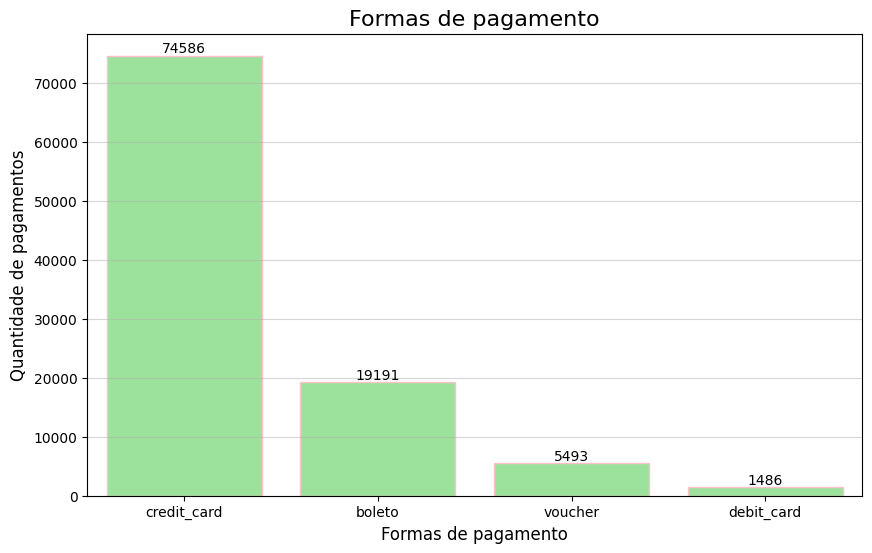

In [ ]:
import seaborn as sns

contagem_tipos = df_olist['payment_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_tipos.index, y=contagem_tipos, color='lightgreen', edgecolor='pink')
plt.title('Formas de pagamento', fontsize=16)
plt.xlabel('Formas de pagamento', fontsize=12)
plt.ylabel('Quantidade de pagamentos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)

ax = plt.gca()
ax.bar_label(ax.containers[0])

plt.show()

## **Qual forma de pagamento mais usada pelos consumidores?**

In [ ]:
df_cartao = df_olist[df_olist['payment_type'] == 'credit_card']

cidade_preferencias = df_cartao['customer_city'].value_counts()

cidade_mais_cartao = cidade_preferencias.idxmax()
transacao_cartao = cidade_preferencias.max()

print(f"A cidade onde mais consumidores preferem pagar com cartão é {cidade_mais_cartao}, com {transacao_cartao} transações.")


A cidade onde mais consumidores preferem pagar com cartão é sao paulo, com 11848 transações.


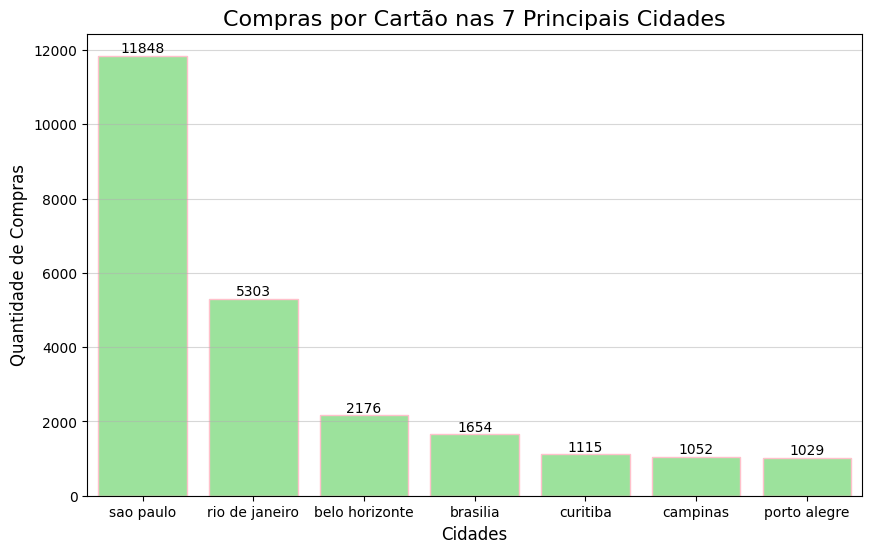

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cartao = df_olist[df_olist['payment_type'] == 'credit_card']
cidade_preferencias = df_cartao['customer_city'].value_counts().head(7)

plt.figure(figsize=(10, 6))
sns.barplot(x=cidade_preferencias.index, y=cidade_preferencias.values, color='lightgreen', edgecolor='pink')

plt.title('Compras por cartão nas 7 principais cidades', fontsize=16)
plt.xlabel('Cidades', fontsize=12)
plt.ylabel('Quantidade de compras', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)

#rótulos das barras
ax = plt.gca()
ax.bar_label(ax.containers[0])
plt.show()

## **Qual o estado onde há mais consumidores que já compraram na Olist?**

In [ ]:
contagem_estados = df_olist['customer_state'].value_counts()

estado_mais_compras = contagem_estados.idxmax()
qtd_mais_compras = contagem_estados.max()
print(f"O estado com mais consumidores que já compraram na Olist é: {estado_mais_compras}, com {qtd_mais_compras} compras.")


O estado com mais consumidores que já compraram na Olist é: SP, com 42308 compras.


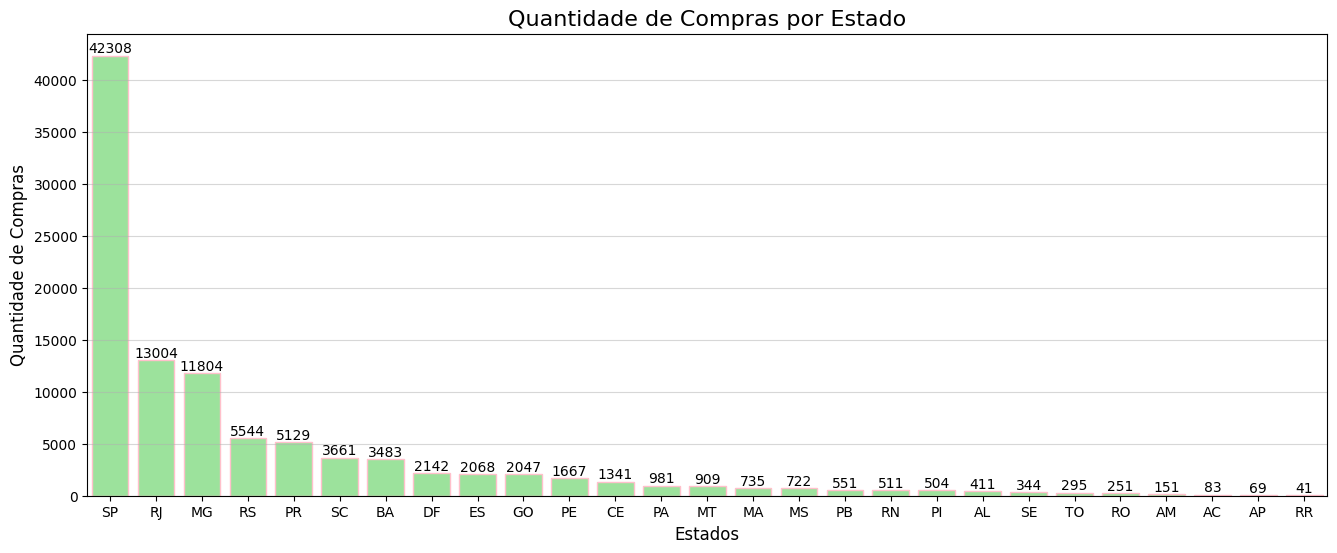

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

contagem_estados = df_olist['customer_state'].value_counts()

plt.figure(figsize=(16, 6))
sns.barplot(x=contagem_estados.index, y=contagem_estados, color='lightgreen', edgecolor='pink')

plt.title('Quantidade de Compras por Estado', fontsize=16)
plt.xlabel('Estados', fontsize=12)
plt.ylabel('Quantidade de Compras', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)

#rótulos
ax = plt.gca()
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()
